In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/201901-202003.csv')
data = data.fillna('')
data = data[['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM', 'AMT']]
data = data.groupby(['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM']).sum().reset_index(drop=False)

In [3]:
submission = pd.read_csv('data/submission.csv', index_col=0)
submission = submission.loc[submission['REG_YYMM']==202004]
submission = submission[['CARD_SIDO_NM', 'STD_CLSS_NM']]
REG_YYMMs = np.sort(data['REG_YYMM'].unique())

AMTs = []
for REG_YYMM in REG_YYMMs:
    df = data.loc[data['REG_YYMM']==REG_YYMM]
    df = df[['CARD_SIDO_NM', 'STD_CLSS_NM', 'AMT']]    
    tmp = submission.merge(df, left_on=['CARD_SIDO_NM', 'STD_CLSS_NM'], right_on=['CARD_SIDO_NM', 'STD_CLSS_NM'], how='left')
    tmp = tmp.fillna(0)
    AMT = list(tmp['AMT'])
    AMTs.append(AMT)  
AMTs = np.array(AMTs)

In [4]:
def plot_graph(dt, AMTs):
    for i in range(dt, len(AMTs)):
        tmp1 = np.log1p(AMTs[i-dt])
        tmp2 = np.log1p(AMTs[i])
        corr = np.corrcoef(tmp1, tmp2)[0][1]
        plt.title('Correlation: %.4f'%(corr))
        plt.scatter(tmp1, tmp2, color='k', alpha=0.1)
        plt.xlabel('Log AMT, %s'%(REG_YYMMs[i-dt]))
        plt.ylabel('Log AMT, %s'%(REG_YYMMs[i]))
        plt.xlim(tmp1.min(), tmp1.max())
        plt.ylim(tmp1.min(), tmp1.max())
        plt.show()

### 1개월 차이

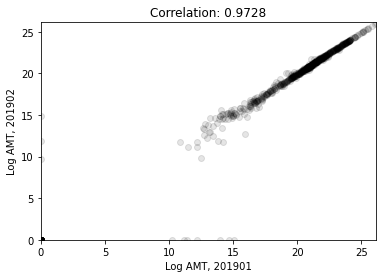

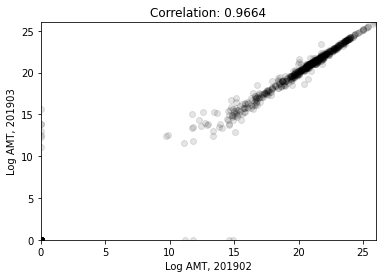

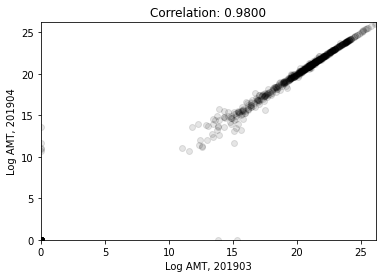

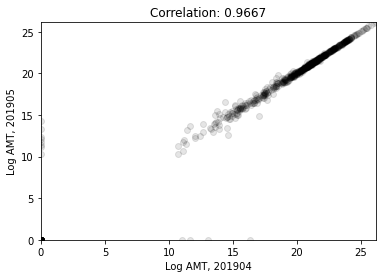

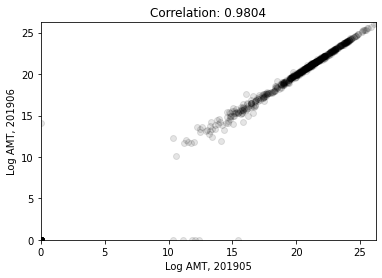

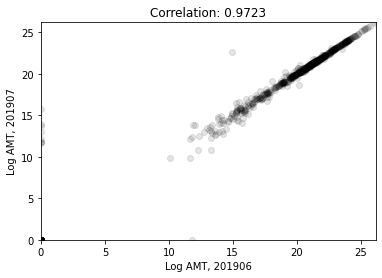

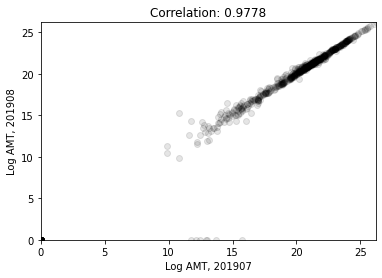

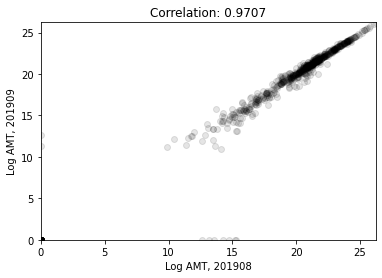

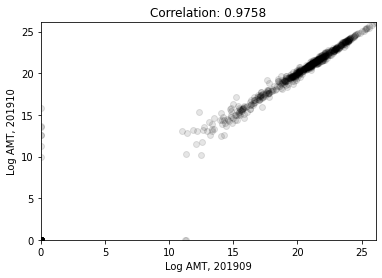

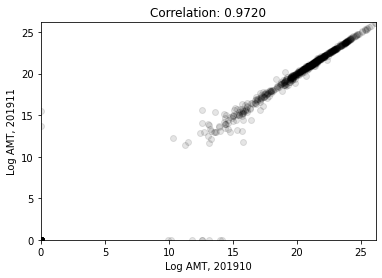

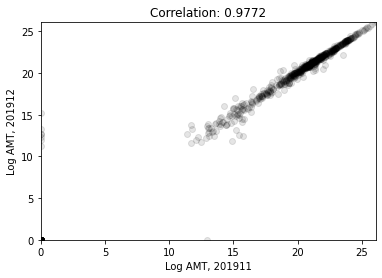

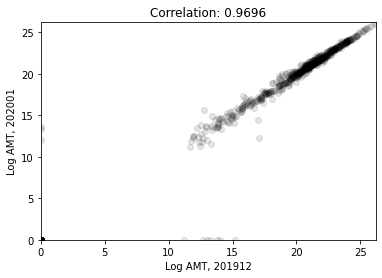

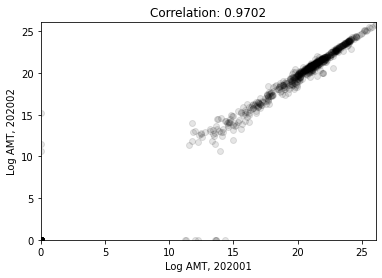

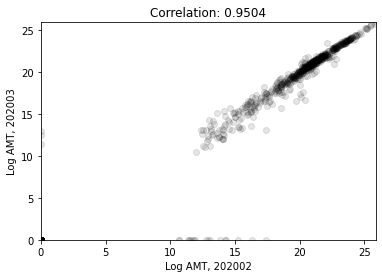

In [5]:
plot_graph(1, AMTs)

### 3개월 차이

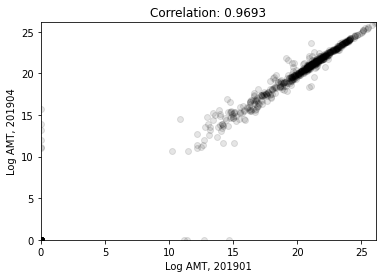

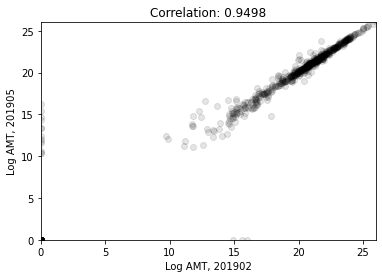

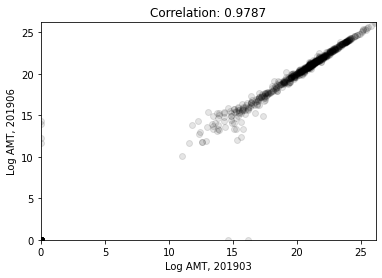

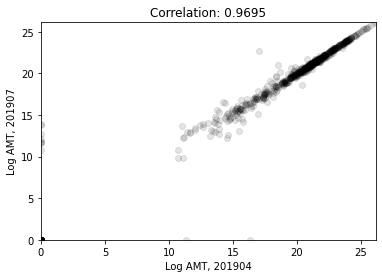

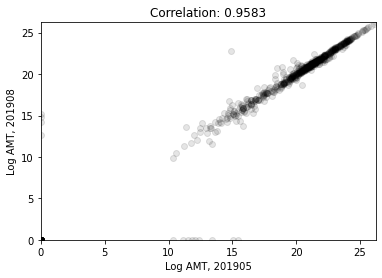

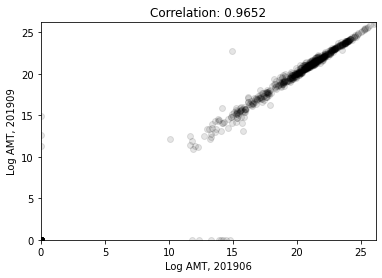

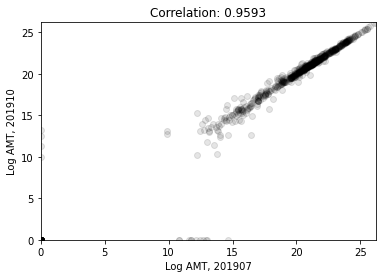

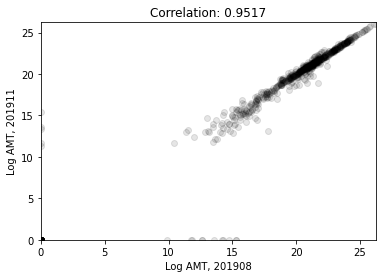

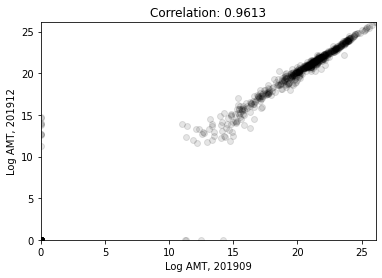

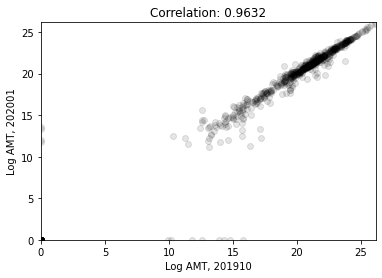

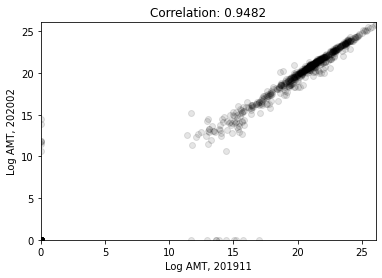

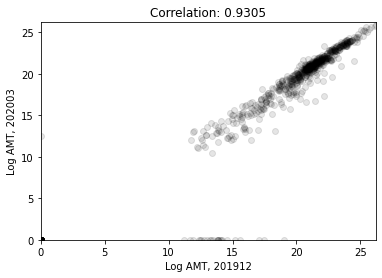

In [6]:
plot_graph(3, AMTs)

### 6개월 차이

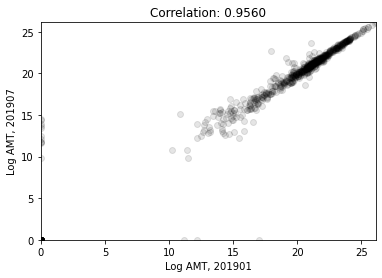

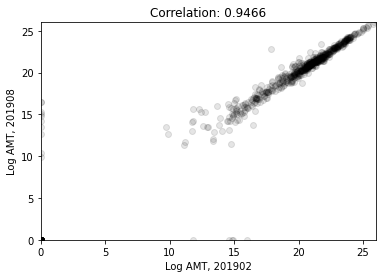

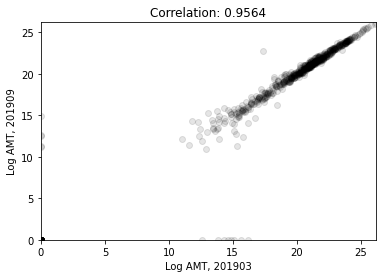

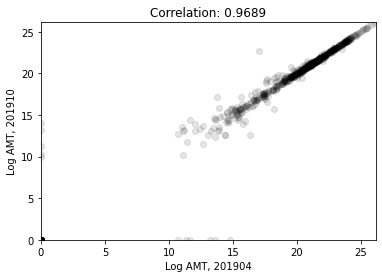

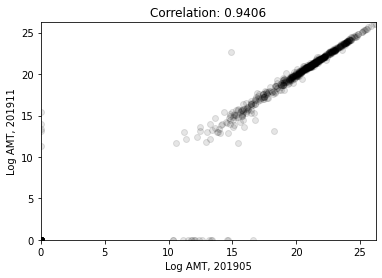

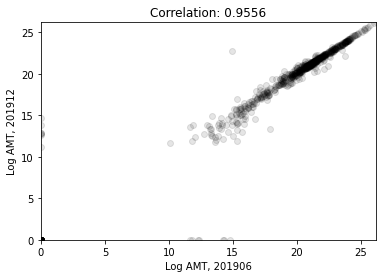

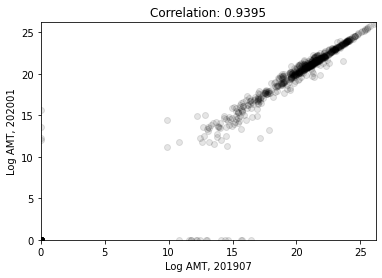

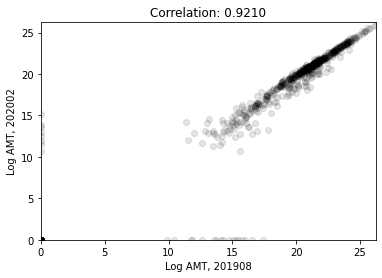

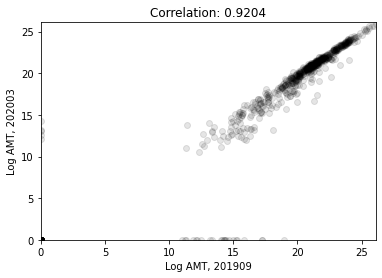

In [7]:
plot_graph(6, AMTs)